### Analysis:###



#### Note:####

1.Here, the randome sample size is purposely taken as 588 jsut in case OpenWeatherMap couldn't find the data for some cities, some back up cities shuld be on the list
Out of 588 cities that was selected randomly, OpenWeatherMap was able to find the data for 503 cities was avilable on the data, and the data for 83 cities was missing.


#### 1.Temperature Vs Latitude plot conclusion: ####

From this scatter plot, we could see that the temperature is heighest around the equator,and it goes down as we go away from it. 
It is definitely going down on the northan hemisphere, and the trend might be the same as we go south. Btu, there are not many countries random selction, we don't know it for sure.



#### 2.  Humidity Vs Laitude: Conclusion: ####

The humidity is almost the same all over the place. It ranges from 20% and goes upto 100%
That indicates that 2/28/18 was the humid day for the cities on the Latitude range from -60 to 80.

#### 3.Cloudiness Vs Latitude: Conclusion:####

Cloudiness Vs Lastitude: There is not visible corelation between the coludoness and Latitude. The clouds are all over the place, and, 100% at most of the places.

100% Clodiness and Humidity means very high chances of rain at those palces.

Certainly, 2/28/18 was a humind and rainy day for cities lying on those Latitude (-60 to 80).
The rain chances rages from 5% to 100% depending on the location of the city.

#### 4. Wind Speed Vs Latitude: Conclusion: ####

Wind speed looks normal. It ranges from 5mph to 30mph except, some outliers.

In [11]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world 
#of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library,
#the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

#Your objective is to build a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [12]:
#Dependancies
import pandas as pd
from citipy import citipy as cp

In [13]:
# We now find the combination of  ( lat,lon) by creating loop for lat in the range -90 to +90, and, lon in the range -180 to 180.
# The we will find the city name corrosponding to that (lat,lon) using citipy module 
# There will be thousands of combunations of (lat,lon). So, we will give by skipping it by 5 in the range.
citylist = []
count = 0
dup = 'no'

# Acoording to AcrcMap( link is given in READ ME):
# (lat) Latitude_range = -90 to + 90
#(lon) Longitude_range = -180 to +180
# Check: GP_cities.py to see howto get lat, lon, cities combination data

for lat in range(-90, 90, 5): 
    for lon in range(-180, 180, 10):
        cp_city = cp.nearest_city(lat,lon) # Capture nearest city from Citipi library
        
        # Use a dictionary to store info of the current city:
        citydict = {} 
        citydict['City_Name'] = cp_city.city_name 
        citydict['Country']= cp_city.country_code
        citydict['Latitude'] = lat
        citydict['Longitude'] = lon
        
        # Add current city info to list: <citylist>:
        if len(citylist) == 0:
            citylist.append(citydict)
            count += 1
            continue
        else:
            #Get rid of duplicates:
            for city_info in citylist:
                if city_info['City_Name'] == citydict['City_Name']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citydict)
            count += 1
        else:
            dup = 'no'

print(len(citylist))

588


In [14]:
import json
import requests as req

In [15]:
# create dataframe to 
citypd = pd.DataFrame({
    "City": [x["City_Name"] for x in citylist],
    "Country": [x["Country"] for x in citylist]
})

citypd.head()

,City,Country
0,vaini,to
1,mataura,pf
2,rikitea,pf
3,punta arenas,cl
4,ushuaia,ar


In [16]:
# import config.py file to read OpenWeatherMap API key, and hide it from the code:
import config

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
base_url = url + "appid=" + config.weather_api_key + "&units=" + units + "&q=" 

In [17]:
count = 0

cities_init = {
    'City': "", 
    'Country': "", 
    'Lat': "", 
    'Lon': "", 
    'Temp': "", 
    'Humidity': "", 
    'Cloudiness': "", 
    'Wind Speed': ""
}
cities500 = pd.DataFrame(data=cities_init, index=[0])

for index,row in citypd.iterrows():
    query_url = base_url + row['City'] + "," + row['Country']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()

        cities500.set_value(count, "City", cityweather['name'])
        cities500.set_value(count, "Country", cityweather['sys']['country'])
        cities500.set_value(count, "Lat", int(cityweather['coord']['lat']))
        cities500.set_value(count, "Lon", int(cityweather['coord']['lon']))
        cities500.set_value(count, "Temp", int(cityweather['main']['temp']))
        cities500.set_value(count, "Humidity", int(cityweather['main']['humidity']))
        cities500.set_value(count, "Cloudiness", int(cityweather['clouds']['all']))
        cities500.set_value(count, "Wind_Speed", int(cityweather['wind']['speed']))
        count+= 1
    except:
        print(f"No data for this city: {row['City'],row['Country']}")

cities500 = cities500[['City', 'Country', 'Cloudiness', 'Humidity', 'Lat', 'Lon', 'Temp', 'Wind_Speed']]
cities500.head()

No data for this city: ('mataura', 'pf')
No data for this city: ('taolanaro', 'mg')
No data for this city: ('tsihombe', 'mg')
No data for this city: ('laguna', 'br')
No data for this city: ('umzimvubu', 'za')
No data for this city: ('marcona', 'pe')
No data for this city: ('toliary', 'mg')
No data for this city: ('grand river south east', 'mu')
No data for this city: ('bengkulu', 'id')
No data for this city: ('halalo', 'wf')
No data for this city: ('satitoa', 'ws')
No data for this city: ('mocambique', 'mz')
No data for this city: ('palabuhanratu', 'id')
No data for this city: ('vaitupu', 'wf')
No data for this city: ('samalaeulu', 'ws')
No data for this city: ('miranorte', 'br')
No data for this city: ('nguiu', 'au')
No data for this city: ('alotau', 'pg')
No data for this city: ('lata', 'sb')
No data for this city: ('saleaula', 'ws')
No data for this city: ('utiroa', 'ki')
No data for this city: ('samusu', 'ws')
No data for this city: ('tucuma', 'br')
No data for this city: ('acarau'

,City,Country,Cloudiness,Humidity,Lat,Lon,Temp,Wind_Speed
0,Vaini,TO,90,94,-21,-175,77,6.0
1,Rikitea,PF,64,98,-23,-134,81,14.0
2,Punta Arenas,CL,75,44,-53,-70,58,43.0
3,Ushuaia,AR,75,54,-54,-68,57,12.0
4,Hermanus,ZA,0,71,-34,19,62,2.0


In [18]:
len(cities500.index)

502

In [19]:
import matplotlib.pyplot as plt

In [20]:
import time
date = time.strftime("%m/%d/%y")
print(date)

02/28/18


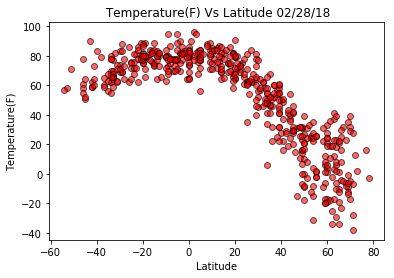

In [21]:
# plotting the graph

plt.scatter(cities500['Lat'],cities500['Temp'],edgecolor = "black", alpha = 0.6, color = "red")
plt.title(f" Temperature(F) Vs Latitude {date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig("TempVsLat.png")
plt.show()

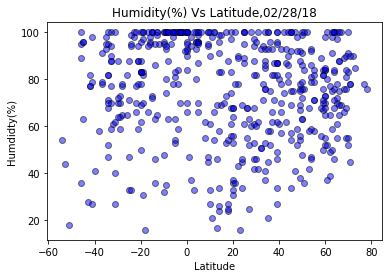

In [22]:
# Humidty vs Lat plot

plt.scatter(cities500["Lat"], cities500["Humidity"], color = "blue", edgecolor = 'black',alpha = 0.5)
plt.title(f"Humidity(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Humdidty(%)")
plt.savefig("HumidityVsLat.png")
plt.show()

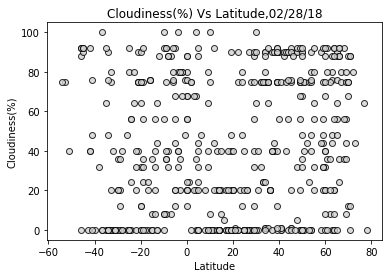

In [23]:
# Cludiness vs Lat plot

plt.scatter(cities500["Lat"], cities500["Cloudiness"], color = "lightgrey", edgecolor = 'black',alpha = 0.8)
plt.title(f"Cloudiness(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("CloudinessVsLat.png")
plt.show()

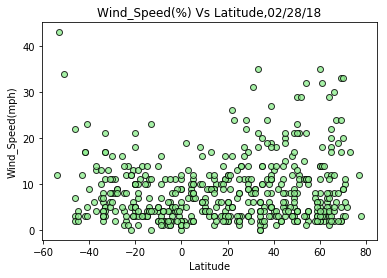

In [24]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities500["Lat"], cities500["Wind_Speed"], color = "lightgreen", edgecolor = 'black',alpha = 0.8)
plt.title(f"Wind_Speed(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.savefig("Wind_SpeedVsLat.png")
plt.show()

In [26]:
# Convert cities500 dataframe to .csv file
cities500.to_csv("cities500.csv", encoding="utf-8", index=False)

# We can check here itself if cities500.csv is created or not, we will create a df. 
# If it exist, df will be created, ortherwise it will give error.

city_df = pd.read_csv("cities500.csv")
city_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lon,Temp,Wind_Speed
0,Vaini,TO,90,94,-21,-175,77,6.0
1,Rikitea,PF,64,98,-23,-134,81,14.0
2,Punta Arenas,CL,75,44,-53,-70,58,43.0
3,Ushuaia,AR,75,54,-54,-68,57,12.0
4,Hermanus,ZA,0,71,-34,19,62,2.0
